# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/input'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

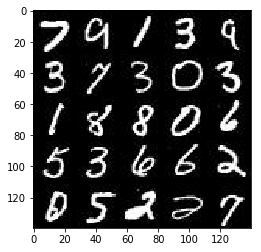

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

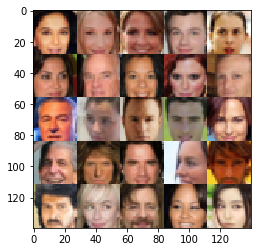

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))


## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.0.0
Default GPU Device: /gpu:0


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    input_real = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='input_real')
    input_z = tf.placeholder(tf.float32, (None, z_dim), name='input_z')
    learning_rate = tf.placeholder(tf.float32, None, name='learning_rate')
    return input_real, input_z, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [14]:
def discriminator(images, reuse=False, alpha=0.1, stddev=0.02):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    with tf.variable_scope('discriminator', reuse=reuse):
        
        
        #Layer 1
        l1 = tf.layers.conv2d(images, 32, 5, 2, padding='same', 
                              kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        
        l1 = tf.maximum(alpha * l1, l1)
        
        
        #Layer2
        l2 = tf.layers.conv2d(l1, 64, 5, 2, padding='same', 
                                   kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        l2 = tf.layers.batch_normalization(l2, training=True)
        layer_2 = tf.maximum(alpha * l2, l2)
        
        
        #Layer3
        l3 = tf.layers.conv2d(l2, 128, 5, 2, padding='same',  
                              kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        l3 = tf.layers.batch_normalization(l3, training=True)
        l3 = tf.maximum(alpha * l3, l3)
        
        #Layer4
        l4 = tf.layers.conv2d(l3, 256, 5, 2, padding='same', 
                              kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        l4 = tf.layers.batch_normalization(l4, training=True)
        l4 = tf.maximum(alpha * l4, l4)
        
        flat = tf.reshape(l4, (-1, 2*2*256))
        logits = tf.layers.dense(flat, 1, kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        output = tf.sigmoid(logits)
        
        return output, logits
        
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [15]:
def generator(z, out_channel_dim, is_train=True, alpha=0.1, stddev=0.02):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    r = not is_train
    with tf.variable_scope('generator', reuse=r):
        
        l1 = tf.layers.dense(z, 4 * 4 * 512)
        l1 = tf.reshape(l1, (-1, 4, 4, 512))
        l1 = tf.layers.batch_normalization(l1, training=is_train)
        l1 = tf.maximum(alpha * l1, l1)
        
        l2 = tf.layers.conv2d_transpose(l1, 128, 4, 1, padding='valid', 
                                        kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        l2 = tf.layers.batch_normalization(l2, training=is_train)
        l2 = tf.maximum(alpha * l2, l2)
        
        l3 = tf.layers.conv2d_transpose(l2, 64, 5, 2, padding='same', 
                                        kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        l3 = tf.layers.batch_normalization(l3, training=is_train)
        l3 = tf.maximum(alpha * l3, l3)
        
        l4 = tf.layers.conv2d_transpose(l3, 32, 5, 2, padding='same',
                                        kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        l4 = tf.layers.batch_normalization(l4, training=is_train)
        l4 = tf.maximum(alpha * l4, l4)
        
        logits = tf.layers.conv2d_transpose(l4, out_channel_dim, 3, 1, padding='same', 
                                            kernel_initializer=tf.random_normal_initializer(stddev=stddev))
        output = tf.tanh(logits)
        
        return output
        


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [ ]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_logits_real) * (1-0.1)))
    
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_logits_fake)))
    
    d_loss = d_loss_real + d_loss_fake
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_logits_fake)))
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [21]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    t_vars = tf.trainable_variables()
    d_vars = [d for d in t_vars if d.name.startswith('discriminator')]
    g_vars = [g for g in t_vars if g.name.startswith('generator')]
    
    gup = [op for op in tf.get_collection(tf.GraphKeys.UPDATE_OPS) if op.name.startswith('generator')]
    
    with tf.control_dependencies(gup):
        d_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_ops = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)
    
    return d_train_ops, g_train_ops


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [22]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [23]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    _, image_width, image_height, image_channels = data_shape
    
    input_real, input_z, in_learning_rate = model_inputs(image_width, image_height, image_channels, z_dim)
    dis_loss, gen_loss = model_loss(input_real, input_z, image_channels)
    dis_ops, gen_ops = model_opt(dis_loss, gen_loss, learning_rate, beta1)
    
    
    saver = tf.train.Saver()
    with tf.Session() as sess:
        log_interval = 30
        image_interval = 100
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            steps = 0
            for batch_images in get_batches(batch_size):
                steps += 1
                batch_images *= 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                _ = sess.run(dis_ops, feed_dict={ input_real: batch_images, 
                                                  input_z: batch_z, 
                                                  in_learning_rate: learning_rate })
                _ = sess.run(gen_ops, feed_dict={ input_z: batch_z, 
                                                  in_learning_rate: learning_rate })
                
                if steps % log_interval == 0:
                    dis_loss_train = dis_loss.eval({ input_z: batch_z, input_real: batch_images })
                    gen_loss_train = gen_loss.eval({ input_z: batch_z })
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                         "Discriminator Loss: {:.4f}...".format(dis_loss_train),
                         "Generator Loss: {:.4f}".format(gen_loss_train))
                    
                if steps % image_interval == 0:
                    show_generator_output(sess, 25, input_z, image_channels, data_image_mode)

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.7272... Generator Loss: 1.3302
Epoch 1/2... Discriminator Loss: 0.3907... Generator Loss: 3.2379
Epoch 1/2... Discriminator Loss: 0.4761... Generator Loss: 2.6009
Epoch 1/2... Discriminator Loss: 1.2057... Generator Loss: 1.1518
Epoch 1/2... Discriminator Loss: 1.5219... Generator Loss: 1.9880
Epoch 1/2... Discriminator Loss: 0.7582... Generator Loss: 1.4898
Epoch 1/2... Discriminator Loss: 0.5425... Generator Loss: 2.3318
Epoch 1/2... Discriminator Loss: 0.6861... Generator Loss: 1.4179
Epoch 1/2... Discriminator Loss: 0.8814... Generator Loss: 1.1302
Epoch 1/2... Discriminator Loss: 0.6361... Generator Loss: 1.9457


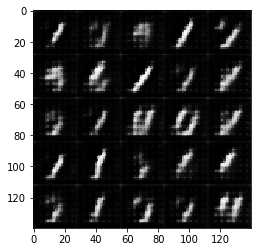

Epoch 1/2... Discriminator Loss: 1.0096... Generator Loss: 1.2542
Epoch 1/2... Discriminator Loss: 1.0684... Generator Loss: 0.8138
Epoch 1/2... Discriminator Loss: 1.2783... Generator Loss: 0.5863
Epoch 1/2... Discriminator Loss: 1.2619... Generator Loss: 1.9849
Epoch 1/2... Discriminator Loss: 0.8949... Generator Loss: 1.2288
Epoch 1/2... Discriminator Loss: 0.7771... Generator Loss: 1.8478
Epoch 1/2... Discriminator Loss: 0.6881... Generator Loss: 1.8731
Epoch 1/2... Discriminator Loss: 1.0008... Generator Loss: 0.9610
Epoch 1/2... Discriminator Loss: 1.2372... Generator Loss: 0.7555
Epoch 1/2... Discriminator Loss: 1.0676... Generator Loss: 1.5900


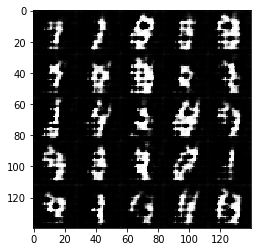

Epoch 1/2... Discriminator Loss: 1.0955... Generator Loss: 0.9296
Epoch 1/2... Discriminator Loss: 0.7571... Generator Loss: 1.3453
Epoch 1/2... Discriminator Loss: 0.8772... Generator Loss: 1.2329
Epoch 1/2... Discriminator Loss: 0.9463... Generator Loss: 1.5524
Epoch 1/2... Discriminator Loss: 0.8562... Generator Loss: 1.5491
Epoch 1/2... Discriminator Loss: 1.3699... Generator Loss: 0.6496
Epoch 1/2... Discriminator Loss: 1.0275... Generator Loss: 1.8939
Epoch 1/2... Discriminator Loss: 1.4595... Generator Loss: 2.6562
Epoch 1/2... Discriminator Loss: 1.0564... Generator Loss: 1.1761
Epoch 1/2... Discriminator Loss: 1.0488... Generator Loss: 0.9450


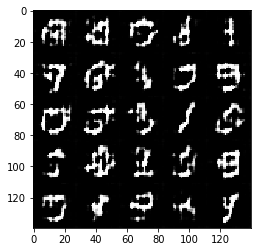

Epoch 1/2... Discriminator Loss: 0.9315... Generator Loss: 1.5602
Epoch 1/2... Discriminator Loss: 0.7417... Generator Loss: 1.8291
Epoch 1/2... Discriminator Loss: 1.3885... Generator Loss: 0.5132
Epoch 1/2... Discriminator Loss: 1.2043... Generator Loss: 0.8383
Epoch 1/2... Discriminator Loss: 2.3357... Generator Loss: 0.1893
Epoch 1/2... Discriminator Loss: 1.1710... Generator Loss: 0.8458
Epoch 1/2... Discriminator Loss: 1.2009... Generator Loss: 0.6501
Epoch 1/2... Discriminator Loss: 1.2991... Generator Loss: 0.5931
Epoch 1/2... Discriminator Loss: 1.0046... Generator Loss: 1.2502
Epoch 1/2... Discriminator Loss: 1.3800... Generator Loss: 0.5698


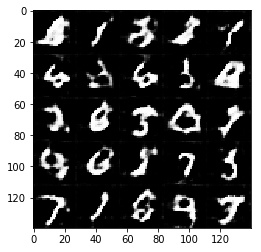

Epoch 1/2... Discriminator Loss: 1.4156... Generator Loss: 0.5783
Epoch 1/2... Discriminator Loss: 0.9448... Generator Loss: 1.2739
Epoch 1/2... Discriminator Loss: 1.3316... Generator Loss: 0.6197
Epoch 1/2... Discriminator Loss: 1.3552... Generator Loss: 0.5028
Epoch 1/2... Discriminator Loss: 1.1868... Generator Loss: 0.9995
Epoch 1/2... Discriminator Loss: 1.7777... Generator Loss: 0.3889
Epoch 1/2... Discriminator Loss: 1.1419... Generator Loss: 1.4746
Epoch 1/2... Discriminator Loss: 1.2946... Generator Loss: 0.6109
Epoch 1/2... Discriminator Loss: 1.6206... Generator Loss: 0.3608
Epoch 1/2... Discriminator Loss: 1.2736... Generator Loss: 1.6903


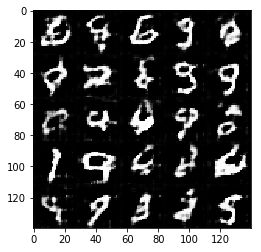

Epoch 1/2... Discriminator Loss: 0.9653... Generator Loss: 1.0268
Epoch 1/2... Discriminator Loss: 1.4048... Generator Loss: 0.5755
Epoch 1/2... Discriminator Loss: 1.2428... Generator Loss: 0.6851
Epoch 1/2... Discriminator Loss: 1.2259... Generator Loss: 0.5904
Epoch 1/2... Discriminator Loss: 1.0755... Generator Loss: 0.9965
Epoch 1/2... Discriminator Loss: 1.2047... Generator Loss: 0.6546
Epoch 1/2... Discriminator Loss: 1.4733... Generator Loss: 0.8372
Epoch 1/2... Discriminator Loss: 1.1741... Generator Loss: 0.8091
Epoch 1/2... Discriminator Loss: 1.5449... Generator Loss: 0.4826
Epoch 1/2... Discriminator Loss: 0.8099... Generator Loss: 1.7125


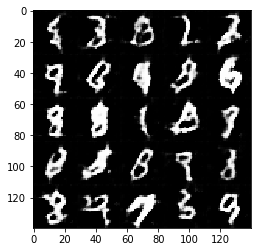

Epoch 1/2... Discriminator Loss: 1.2057... Generator Loss: 2.6382
Epoch 1/2... Discriminator Loss: 1.0588... Generator Loss: 1.0426
Epoch 1/2... Discriminator Loss: 1.5125... Generator Loss: 2.9323
Epoch 1/2... Discriminator Loss: 0.9309... Generator Loss: 1.1338
Epoch 1/2... Discriminator Loss: 1.4204... Generator Loss: 0.6754
Epoch 1/2... Discriminator Loss: 1.1436... Generator Loss: 0.6844
Epoch 1/2... Discriminator Loss: 1.3983... Generator Loss: 0.4879
Epoch 1/2... Discriminator Loss: 1.8687... Generator Loss: 0.2802
Epoch 1/2... Discriminator Loss: 1.0355... Generator Loss: 1.0890
Epoch 1/2... Discriminator Loss: 0.9938... Generator Loss: 1.7447


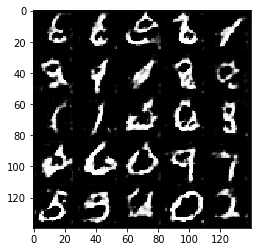

Epoch 1/2... Discriminator Loss: 1.3456... Generator Loss: 1.8920
Epoch 1/2... Discriminator Loss: 0.9265... Generator Loss: 0.9375
Epoch 1/2... Discriminator Loss: 0.9230... Generator Loss: 1.2722
Epoch 1/2... Discriminator Loss: 0.7633... Generator Loss: 1.2502
Epoch 1/2... Discriminator Loss: 1.0172... Generator Loss: 0.8021
Epoch 1/2... Discriminator Loss: 1.1281... Generator Loss: 0.6827
Epoch 1/2... Discriminator Loss: 1.2291... Generator Loss: 0.8099
Epoch 1/2... Discriminator Loss: 0.9856... Generator Loss: 1.2456
Epoch 1/2... Discriminator Loss: 1.1938... Generator Loss: 0.6911
Epoch 1/2... Discriminator Loss: 1.1550... Generator Loss: 0.7886


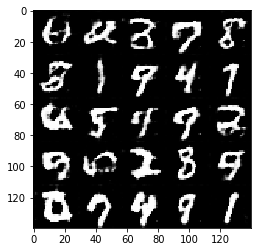

Epoch 1/2... Discriminator Loss: 1.4922... Generator Loss: 0.4706
Epoch 1/2... Discriminator Loss: 1.1188... Generator Loss: 1.2241
Epoch 1/2... Discriminator Loss: 0.9958... Generator Loss: 1.1875
Epoch 1/2... Discriminator Loss: 0.9933... Generator Loss: 1.1580
Epoch 1/2... Discriminator Loss: 1.3530... Generator Loss: 0.5097
Epoch 1/2... Discriminator Loss: 0.8326... Generator Loss: 1.2896
Epoch 1/2... Discriminator Loss: 0.8910... Generator Loss: 1.0215
Epoch 1/2... Discriminator Loss: 1.1306... Generator Loss: 0.7322
Epoch 1/2... Discriminator Loss: 0.9135... Generator Loss: 1.1979
Epoch 1/2... Discriminator Loss: 2.1346... Generator Loss: 0.2166


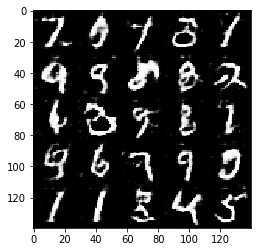

Epoch 1/2... Discriminator Loss: 1.4260... Generator Loss: 0.5039
Epoch 1/2... Discriminator Loss: 1.6581... Generator Loss: 0.4020
Epoch 1/2... Discriminator Loss: 1.4428... Generator Loss: 0.4693
Epoch 2/2... Discriminator Loss: 1.3792... Generator Loss: 0.5249
Epoch 2/2... Discriminator Loss: 0.8770... Generator Loss: 1.2730
Epoch 2/2... Discriminator Loss: 1.3808... Generator Loss: 0.7920
Epoch 2/2... Discriminator Loss: 1.0637... Generator Loss: 2.5280
Epoch 2/2... Discriminator Loss: 1.0096... Generator Loss: 0.9391
Epoch 2/2... Discriminator Loss: 1.2465... Generator Loss: 0.7592
Epoch 2/2... Discriminator Loss: 0.8121... Generator Loss: 1.6372


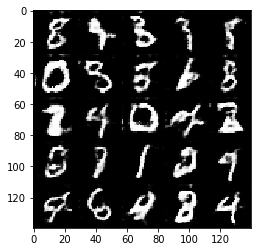

Epoch 2/2... Discriminator Loss: 1.0608... Generator Loss: 1.1858
Epoch 2/2... Discriminator Loss: 1.2384... Generator Loss: 0.6124
Epoch 2/2... Discriminator Loss: 1.3718... Generator Loss: 0.4930
Epoch 2/2... Discriminator Loss: 1.1446... Generator Loss: 0.8638
Epoch 2/2... Discriminator Loss: 1.1688... Generator Loss: 0.9099
Epoch 2/2... Discriminator Loss: 1.3407... Generator Loss: 1.4246
Epoch 2/2... Discriminator Loss: 1.3744... Generator Loss: 0.5481
Epoch 2/2... Discriminator Loss: 1.4532... Generator Loss: 0.4702
Epoch 2/2... Discriminator Loss: 1.4270... Generator Loss: 0.4869
Epoch 2/2... Discriminator Loss: 0.9943... Generator Loss: 1.1153


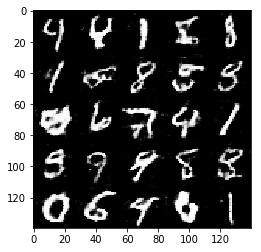

Epoch 2/2... Discriminator Loss: 1.4529... Generator Loss: 0.4899
Epoch 2/2... Discriminator Loss: 1.5774... Generator Loss: 0.4015
Epoch 2/2... Discriminator Loss: 1.0764... Generator Loss: 2.1110
Epoch 2/2... Discriminator Loss: 1.4389... Generator Loss: 0.5355
Epoch 2/2... Discriminator Loss: 1.1460... Generator Loss: 0.7364
Epoch 2/2... Discriminator Loss: 1.2380... Generator Loss: 0.5837
Epoch 2/2... Discriminator Loss: 2.0395... Generator Loss: 0.2745
Epoch 2/2... Discriminator Loss: 1.4528... Generator Loss: 3.0423
Epoch 2/2... Discriminator Loss: 1.5396... Generator Loss: 0.4211
Epoch 2/2... Discriminator Loss: 0.9528... Generator Loss: 0.9516


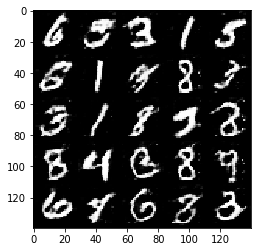

Epoch 2/2... Discriminator Loss: 1.7122... Generator Loss: 1.6870
Epoch 2/2... Discriminator Loss: 1.4721... Generator Loss: 0.4507
Epoch 2/2... Discriminator Loss: 1.5513... Generator Loss: 0.3900
Epoch 2/2... Discriminator Loss: 1.1819... Generator Loss: 0.7109
Epoch 2/2... Discriminator Loss: 0.8514... Generator Loss: 1.7725
Epoch 2/2... Discriminator Loss: 1.2472... Generator Loss: 0.5702
Epoch 2/2... Discriminator Loss: 0.9150... Generator Loss: 0.9151
Epoch 2/2... Discriminator Loss: 0.9491... Generator Loss: 0.9680
Epoch 2/2... Discriminator Loss: 1.5048... Generator Loss: 0.5021
Epoch 2/2... Discriminator Loss: 2.2020... Generator Loss: 0.2052
Epoch 2/2... Discriminator Loss: 1.0531... Generator Loss: 0.7972
Epoch 2/2... Discriminator Loss: 1.3464... Generator Loss: 0.5278
Epoch 2/2... Discriminator Loss: 0.9433... Generator Loss: 1.0763


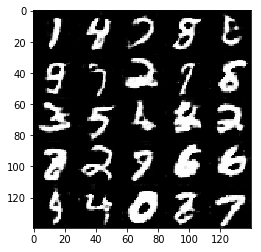

Epoch 2/2... Discriminator Loss: 1.3697... Generator Loss: 0.5055
Epoch 2/2... Discriminator Loss: 0.9753... Generator Loss: 0.8814
Epoch 2/2... Discriminator Loss: 1.3663... Generator Loss: 1.0213
Epoch 2/2... Discriminator Loss: 1.6552... Generator Loss: 0.3538
Epoch 2/2... Discriminator Loss: 0.9356... Generator Loss: 1.1569
Epoch 2/2... Discriminator Loss: 1.3393... Generator Loss: 0.5494
Epoch 2/2... Discriminator Loss: 0.8141... Generator Loss: 1.6562
Epoch 2/2... Discriminator Loss: 1.8983... Generator Loss: 0.3250
Epoch 2/2... Discriminator Loss: 1.8073... Generator Loss: 0.3023
Epoch 2/2... Discriminator Loss: 1.2792... Generator Loss: 2.0824


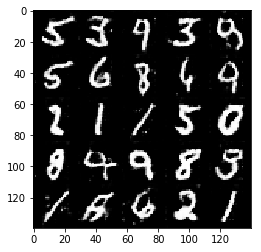

Epoch 2/2... Discriminator Loss: 1.5023... Generator Loss: 0.4101
Epoch 2/2... Discriminator Loss: 1.7826... Generator Loss: 0.3251
Epoch 2/2... Discriminator Loss: 2.0668... Generator Loss: 0.2572
Epoch 2/2... Discriminator Loss: 1.0206... Generator Loss: 0.8605
Epoch 2/2... Discriminator Loss: 1.2341... Generator Loss: 0.6418
Epoch 2/2... Discriminator Loss: 1.7067... Generator Loss: 0.3581
Epoch 2/2... Discriminator Loss: 1.3992... Generator Loss: 0.4596


In [ ]:
batch_size = 64
z_dim = 128
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.1212... Generator Loss: 2.3227
Epoch 1/1... Discriminator Loss: 0.9433... Generator Loss: 1.2522
Epoch 1/1... Discriminator Loss: 0.6720... Generator Loss: 2.2519


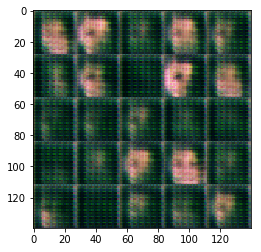

Epoch 1/1... Discriminator Loss: 1.5906... Generator Loss: 3.6068
Epoch 1/1... Discriminator Loss: 1.1226... Generator Loss: 0.9041
Epoch 1/1... Discriminator Loss: 1.9178... Generator Loss: 0.3481


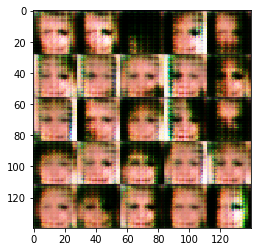

Epoch 1/1... Discriminator Loss: 1.1201... Generator Loss: 0.7489
Epoch 1/1... Discriminator Loss: 1.3881... Generator Loss: 0.8165
Epoch 1/1... Discriminator Loss: 1.0745... Generator Loss: 1.1844
Epoch 1/1... Discriminator Loss: 1.2365... Generator Loss: 0.9626


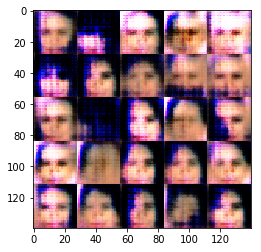

Epoch 1/1... Discriminator Loss: 0.8468... Generator Loss: 1.3595
Epoch 1/1... Discriminator Loss: 1.2019... Generator Loss: 0.5847
Epoch 1/1... Discriminator Loss: 1.1072... Generator Loss: 1.2448


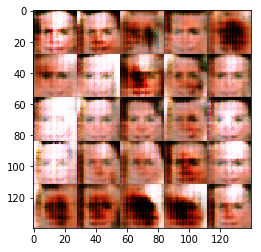

Epoch 1/1... Discriminator Loss: 0.9186... Generator Loss: 1.8998
Epoch 1/1... Discriminator Loss: 1.1224... Generator Loss: 1.0916
Epoch 1/1... Discriminator Loss: 0.8268... Generator Loss: 1.5016


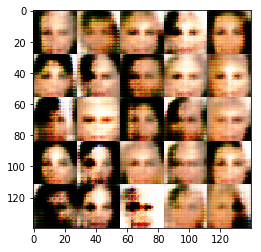

Epoch 1/1... Discriminator Loss: 1.4540... Generator Loss: 0.6692
Epoch 1/1... Discriminator Loss: 0.9806... Generator Loss: 2.1719
Epoch 1/1... Discriminator Loss: 0.9296... Generator Loss: 0.9345
Epoch 1/1... Discriminator Loss: 0.7604... Generator Loss: 1.3258


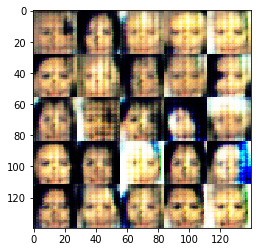

Epoch 1/1... Discriminator Loss: 1.2543... Generator Loss: 0.6303
Epoch 1/1... Discriminator Loss: 0.7801... Generator Loss: 1.1946
Epoch 1/1... Discriminator Loss: 1.1949... Generator Loss: 1.7138


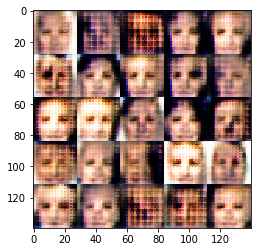

Epoch 1/1... Discriminator Loss: 1.0548... Generator Loss: 0.7866
Epoch 1/1... Discriminator Loss: 0.8171... Generator Loss: 1.2760
Epoch 1/1... Discriminator Loss: 1.0128... Generator Loss: 1.0157


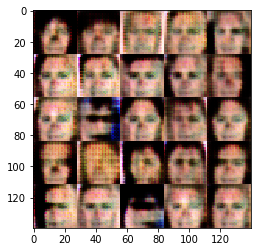

Epoch 1/1... Discriminator Loss: 0.9705... Generator Loss: 2.0833
Epoch 1/1... Discriminator Loss: 1.0803... Generator Loss: 0.8043
Epoch 1/1... Discriminator Loss: 1.1683... Generator Loss: 0.6750
Epoch 1/1... Discriminator Loss: 2.0025... Generator Loss: 3.3982


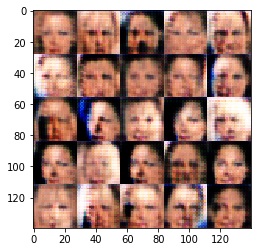

Epoch 1/1... Discriminator Loss: 1.1710... Generator Loss: 0.6657
Epoch 1/1... Discriminator Loss: 1.1724... Generator Loss: 1.1447
Epoch 1/1... Discriminator Loss: 1.4464... Generator Loss: 0.4837
Epoch 1/1... Discriminator Loss: 0.8281... Generator Loss: 1.3149


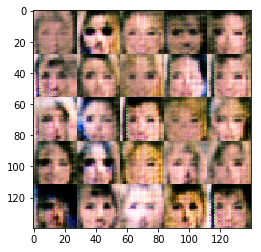

Epoch 1/1... Discriminator Loss: 2.1135... Generator Loss: 0.2302
Epoch 1/1... Discriminator Loss: 0.8370... Generator Loss: 1.4007
Epoch 1/1... Discriminator Loss: 1.0615... Generator Loss: 1.3205


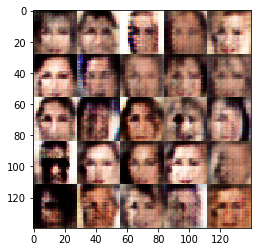

Epoch 1/1... Discriminator Loss: 1.0983... Generator Loss: 0.8738
Epoch 1/1... Discriminator Loss: 0.7805... Generator Loss: 1.2535
Epoch 1/1... Discriminator Loss: 1.1128... Generator Loss: 1.7232


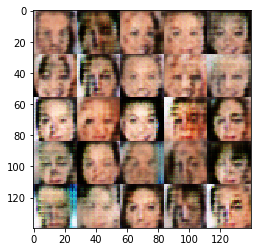

Epoch 1/1... Discriminator Loss: 0.9218... Generator Loss: 1.1700
Epoch 1/1... Discriminator Loss: 0.7993... Generator Loss: 2.3385
Epoch 1/1... Discriminator Loss: 1.3529... Generator Loss: 0.5603
Epoch 1/1... Discriminator Loss: 1.3198... Generator Loss: 3.8712


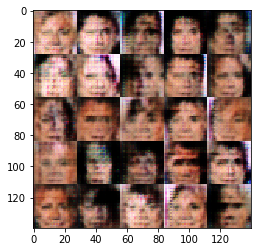

Epoch 1/1... Discriminator Loss: 1.1109... Generator Loss: 2.1629
Epoch 1/1... Discriminator Loss: 0.7253... Generator Loss: 1.5201


In [ ]:
batch_size = 128
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.